# Result analysis 

In [4]:
import numpy as np 
import matplotlib.pyplot as plt
import trimesh 
from mpl_toolkits.mplot3d import Axes3D

In [31]:
#dataDir = "/Users/zuozhu/Git/RPC_results/exp0/test_results/"
dataDir = "/Users/zuozhu/Git/RPC_results/density_est/exp2/test_results/"

In [40]:
sample = np.load(dataDir + 'samples_60.npy')
sample.shape

(2048, 3, 1)

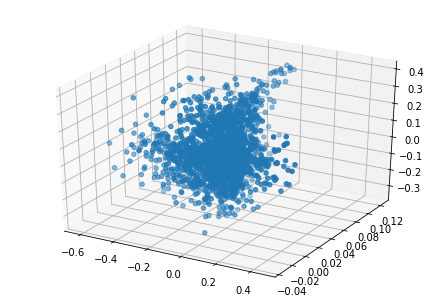

In [41]:
# idx = 3
# x = sample[idx,0,:]
# y = sample[idx,1,:]
# z = sample[idx,2,:]
# fig = plt.figure()
# ax = Axes3D(fig)
# ax.scatter(x, y, z)
# plt.show()

sample = sample[:,:,0].transpose()
x = sample[0,:]
y = sample[1,:]
z = sample[2,:]
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(x, y, z)
plt.show()

In [42]:
import copy
import numpy as np
import open3d as o3d


#xyz = sample[idx].transpose()
#xyz = ori_sample 
xyz = sample.transpose()

pcd = o3d.geometry.PointCloud()
pcd.points = o3d.utility.Vector3dVector(xyz)
o3d.io.write_point_cloud( dataDir + "sync.ply", pcd)

# Load saved point cloud and visualize it
pcd_load = o3d.io.read_point_cloud( dataDir + "sync.ply")
o3d.visualization.draw_geometries([pcd_load])
# convert Open3D.o3d.geometry.PointCloud to numpy array
xyz_load = np.asarray(pcd_load.points)

# save z_norm as an image (change [0,1] range to [0,255] range with uint8 type)
# img = o3d.geometry.Image((z_norm * 255).astype(np.uint8))
# o3d.io.write_image(dataDir + "sync.png", img)
#o3d.visualization.draw_geometries([img])

In [28]:
orignal_data = "/Users/zuozhu/Git/ResFlowPC/data/ShapeNetCore.v2.PC15k/02691156/train/"

In [29]:
ori_sample = np.load(orignal_data + 'ffef991d85e3136a9a6e43b878d5b335.npy')
idx = np.random.choice(15000, 2048)
ori_sample = ori_sample[idx, :]

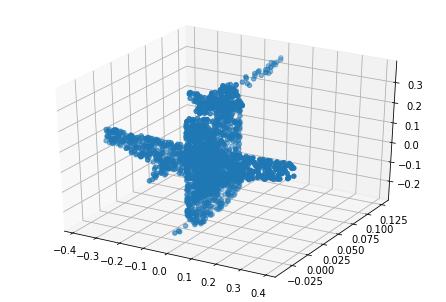

In [30]:
x = ori_sample[:,0]
y = ori_sample[:,1]
z = ori_sample[:,2]
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(x, y, z )
plt.show()

In [191]:
print(y.mean())

0.054974087


In [179]:
print(y.min())

-3.3840857


In [175]:
import torch 
m = torch.nn.Tanh()
x = torch.randn(2)
y = m(x)
y

tensor([ 0.8044, -0.9890])

In [185]:
x

array([-0.25723723,  1.2424103 , -1.3326087 , ..., -1.1156349 ,
        0.8171415 , -1.330249  ], dtype=float32)

In [177]:
def inverse_tanh(x):
    return 0.5 * torch.log((1+x)/(1-x))

In [178]:
xx = inverse_tanh(y)
xx

tensor([ 1.1108, -2.5990])

In [200]:
import torch.nn as nn
class TanhTransform(nn.Module):

    def __init__(self):
        nn.Module.__init__(self)
        self.m = nn.Tanh()

    def forward(self, x, logpx=None):
        x = self.m(x)
        if logpx is None:
            return x
        return x, logpx

    def inverse(self, y, logpy=None):
        y = 0.5 * torch.log((1+y)/(1-y))
        print(y)
        if logpy is None:
            return y
        return y, logpy


if __name__ == '__main__':
    m = TanhTransform()
    x = torch.randn(2)
    y = m(x)
    xx = m.inverse(y)
    print('x', x)
    #print(xx)

tensor([-1.4721,  0.2169])
x tensor([-1.4721,  0.2169])


In [193]:
x = torch.tensor([-1.2948,  0.2341])

In [194]:
y = nn.Tanh()(x)

In [195]:
y

tensor([-0.8604,  0.2299])

In [196]:
z = 0.5 * torch.log((1+y)/(1-y))
z

tensor([-1.2948,  0.2341])

In [201]:
torch.as_tensor([1, 1])

tensor([1, 1])